## Convolutional Neural Network (CNN)

A **Convolutional Neural Network (CNN)** is a type of deep learning model designed to automatically **extract features** from grid-like data, such as images. CNNs are widely used in image classification, object detection, and other computer vision tasks.

### Key Components

#### 1. Input Layer
- Accepts images as 3D arrays: **Height x Width x Channels**.
- Example: RGB image → `(128, 128, 3)`.

#### 2. Convolutional Layer (Conv2D)
- Uses **filters/kernels** to scan the input and detect features like edges, textures, and shapes.
- **Operation:** \( Z = X * W + b \)
- **Activation:** Often **ReLU** to introduce non-linearity.

#### 3. Pooling Layer (MaxPooling2D / AveragePooling2D)
- Reduces spatial dimensions of feature maps.
- **Max Pooling:** Takes the maximum value in a window.
- **Average Pooling:** Takes the average value.
- Reduces computation and adds **translation invariance**.

#### 4. Flatten Layer
- Converts 2D/3D feature maps into a 1D vector.
- Prepares data for fully connected layers.

#### 5. Fully Connected (Dense) Layer
- Standard neural network layers where each neuron is connected to all neurons in the previous layer.
- Performs classification based on extracted features.

#### 6. Output Layer
- **Activation depends on task:**
  - **Classification:** Softmax for multi-class, Sigmoid for binary.
  - **Regression:** Linear activation.

### Training Components

- **Optimizer:**  
  - An `optimizer` is an algorithm used to adjust the weights and biases of a neural network during training in order to minimize the loss function.
  - **Adam** is commonly used in CNNs.  
  - Combines **momentum** and **adaptive learning rates** for efficient training.

- **Loss Function:**  
  - **categorical_crossentropy** for multi-class classification tasks.  
  - Measures the difference between predicted probabilities and true labels.

- **Metrics:** Accuracy is typically used for classification.


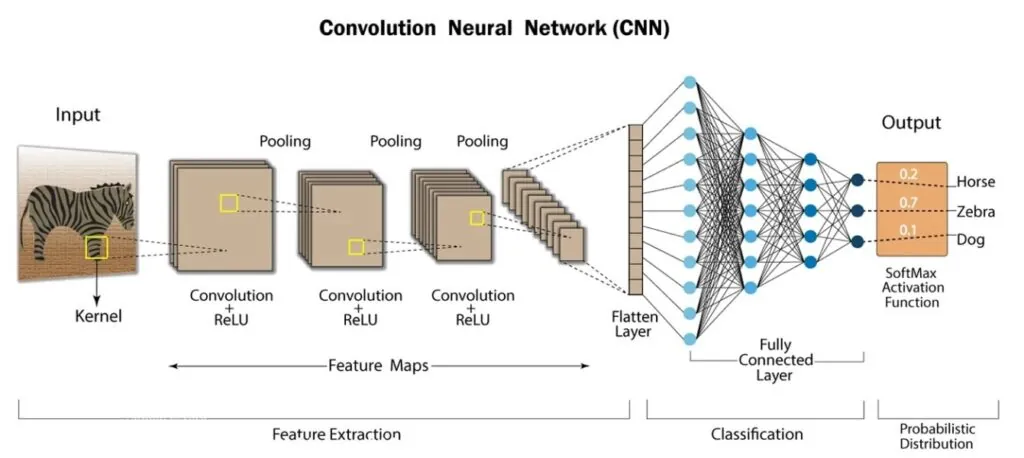

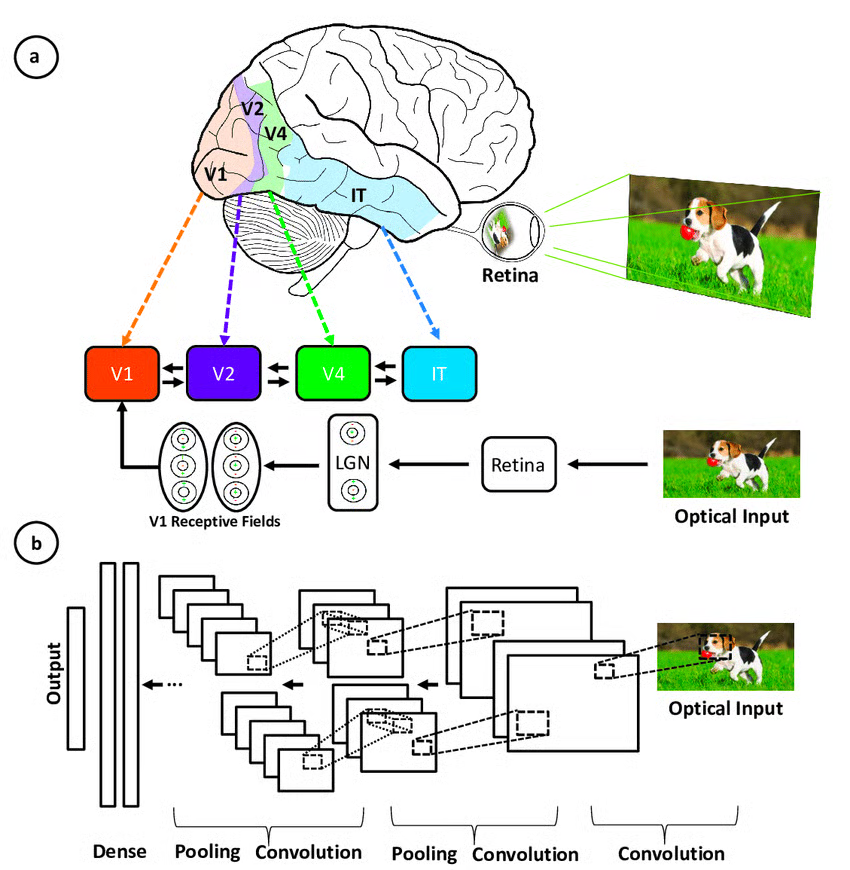

## Applications of Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are widely used in various fields due to their ability to automatically extract spatial features from data such as images, videos, and even text.

### 1. Computer Vision
CNNs are most popular in tasks where images or videos are the primary data input.
- **Image Classification**: Identifying objects or scenes in an image (e.g., classifying dogs, cats, cars).
- **Object Detection**: Locating and labeling multiple objects within an image (e.g., YOLO, Faster R-CNN).
- **Facial Recognition**: Unlocking devices or tagging people in photos (e.g., Face ID, social media).
- **Image Segmentation**: Separating objects from the background for medical imaging or self-driving cars.
- **Pose Estimation**: Detecting human body positions (used in AR/VR and sports analytics).

### 2. Medical Imaging
CNNs assist doctors in diagnosis by analyzing medical images.
- **Disease Detection**: Detecting tumors, pneumonia, or fractures from X-rays, MRIs, or CT scans.
- **Histopathology**: Identifying cancerous cells in tissue samples.
- **Retinal Image Analysis**: Screening for diabetic retinopathy.
- **Brain Imaging**: Detecting neurological disorders such as Alzheimer’s or stroke-affected areas.

### 3. Autonomous Vehicles
CNNs help self-driving cars perceive their surroundings.
- **Lane Detection**: Identifying road lanes in real-time.
- **Traffic Sign Recognition**: Reading and classifying traffic signs.
- **Pedestrian/Object Detection**: Detecting people, vehicles, and obstacles.

### 4. Natural Language Processing (NLP)
Although RNNs and Transformers are more common, CNNs are still used in text-based tasks.
- **Text Classification**: Sentiment analysis, spam detection.
- **Document Analysis**: Identifying key phrases or topic classification.
- **Character Recognition**: Handwriting recognition (e.g., OCR).

### 5. Agriculture
CNNs enhance crop production and health monitoring.
- **Plant Disease Detection**: Identifying infections from leaf images.
- **Crop Monitoring**: Counting plants or fruits using drone images.

### 6. Security & Surveillance
- **Face Recognition**: Access control systems and identity verification.
- **Anomaly Detection**: Identifying suspicious activities in CCTV footage.

### 7. Art & Entertainment
- **Style Transfer**: Turning photos into artworks (e.g., Prisma app).
- **Deepfake Generation**: Creating realistic face swaps.
- **Image/Video Restoration**: Removing noise, improving quality, or colorizing old photos.

### 8. Manufacturing & Industry
- **Defect Detection**: Identifying product defects on assembly lines.
- **Quality Control**: Checking dimensions, color, and surface finish.

### 9. Retail & E-commerce
- **Visual Search**: Finding products by uploading an image instead of using text.
- **Recommendation Systems**: Suggesting visually similar items.


### CIFAR-10 CNN

In [3]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#### Download and prepare the CIFAR10 dataset
The `CIFAR10` dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 

The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 307s 2us/step


In [5]:
# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#### Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

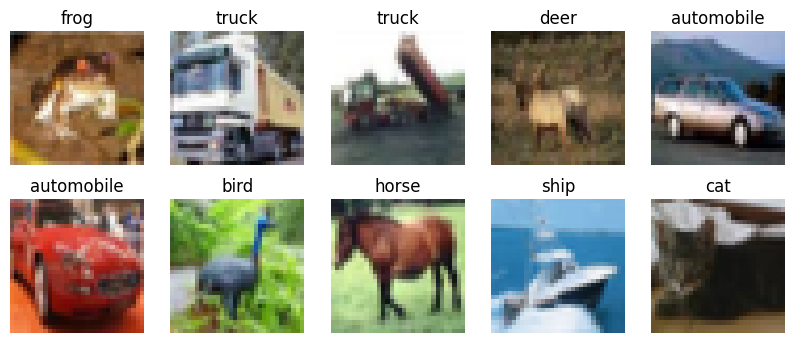

In [7]:
# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Display some sample images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

#### Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

#### Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [8]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

c:\Users\user\Desktop\data-science-class\07-Deep_Learning\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Conv2D layer (Convolutional layer):

- 32 filters → the layer will learn 32 different feature maps (like edges, textures).
- (3,3) kernel size → small 3x3 sliding window for detecting features.
- Activation='relu' → introduces non-linearity and helps the network learn complex patterns.
- input_shape=(32,32,3) → input images are 32x32 pixels with 3 color channels (RGB).

Max Pooling layer:

- Reduces the spatial size of feature maps by taking the maximum value in each 2x2 window.
- Helps reduce computation and adds translation invariance.
- After this, feature maps become smaller (half the height and width).

Dense (fully connected) layer:
- 64 neurons, ReLU activation.
- Learns complex combinations of features extracted by convolutional layers.

Output layer:

- 10 neurons → one for each CIFAR-10 class.
- Softmax activation → converts outputs into probabilities that sum to 1.
- The class with the highest probability is the model’s prediction.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.4323 - loss: 1.5612 - val_accuracy: 0.5204 - val_loss: 1.3039
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.5760 - loss: 1.1924 - val_accuracy: 0.6142 - val_loss: 1.1183
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.6353 - loss: 1.0357 - val_accuracy: 0.6414 - val_loss: 1.0298
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6670 - loss: 0.9462 - val_accuracy: 0.6570 - val_loss: 0.9884
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.6939 - loss: 0.8782 - val_accuracy: 0.6932 - val_loss: 0.9164
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.7138 - loss: 0.8263 - val_accuracy: 0.6808 - val_loss: 0.9246
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.7286 - loss: 0.7739 - val_accuracy: 0.7202 - val_loss: 0.8498
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7422 - loss: 0.7328 - 

### Evaluate the model

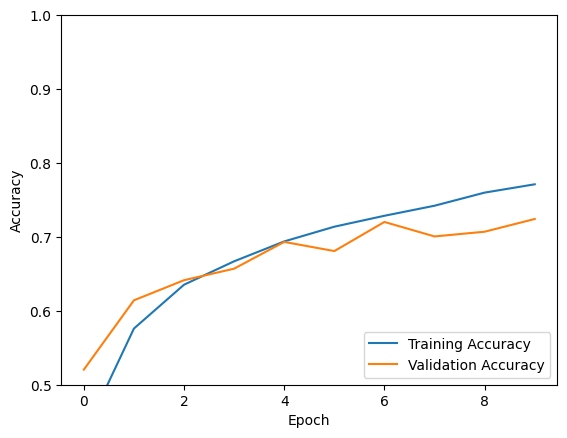

313/313 - 3s - 10ms/step - accuracy: 0.6997 - loss: 0.8736
Test Accuracy: 0.6997


In [13]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

In [14]:
# Make predictions on some test images
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


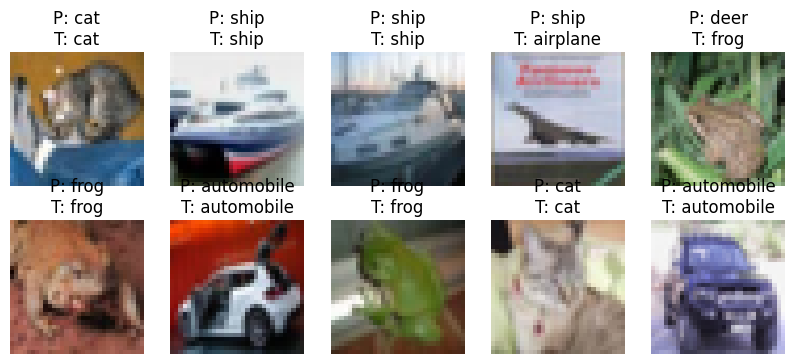

In [15]:
# Display test images with predicted labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    plt.title(f"P: {pred_label}\nT: {true_label}")
    plt.axis('off')
plt.show()

## Data Augmentation in CNN (Convolutional Neural Networks)

**Data Augmentation** is a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

Instead of collecting new images, we create **new, slightly modified versions** of existing images while keeping their **labels the same**.

CNNs (Convolutional Neural Networks) are data-hungry models that require **large and diverse datasets** to learn meaningful patterns.  

Data augmentation provides this diversity **without the cost of additional data collection**.

### Why Data Augmentation is Important in CNN
CNNs have millions of parameters, and when the dataset is small, they tend to **memorize the training images** instead of learning the underlying patterns.  
Data augmentation helps address several key problems:

### 1. Prevents Overfitting
- **Overfitting** occurs when the model performs well on training data but poorly on unseen data.
- By introducing **random variations** in the training images (e.g., rotations, flips, color changes), the model learns to generalize instead of memorizing.
- Each epoch presents the network with **new versions of the same images**, increasing robustness.

### 2. Improves Generalization
- Real-world images can appear in different **angles, positions, brightness levels, or with noise**.
- Augmentation teaches the CNN to recognize objects even when they are slightly **shifted, rotated, or distorted**, improving performance on **test and real-world data**.

### 3. Compensates for Limited Data
- Collecting and labeling new images is **expensive and time-consuming**.
- Data augmentation generates **virtually infinite training examples** from a small dataset by applying transformations on the fly.

## Common Data Augmentation Techniques

Below are some **popular augmentation techniques** used in CNN-based image tasks such as **image classification, object detection, and segmentation**.

| Technique | Description | Example Effect |
|-----------|-------------|-----------------|
| **Rotation** | Rotate images by small angles (e.g., ±10° to ±30°) | Makes the model invariant to object orientation |
| **Flipping (Horizontal/Vertical)** | Flip images horizontally or vertically | Helps recognize mirrored objects |
| **Scaling/Zooming** | Randomly zoom in or out | Handles objects appearing at different distances |
| **Translation/Shift** | Move the image along x or y axis | Makes the model robust to off-center objects |
| **Random Cropping** | Randomly crop parts of the image | Improves detection of partial or occluded objects |
| **Brightness/Contrast Adjustment** | Increase or decrease brightness and contrast | Adapts the model to varying lighting conditions |
| **Color Jitter** | Random changes in hue, saturation, or exposure | Makes the model color-invariant |
| **Noise Injection (Gaussian/Poisson)** | Add random pixel noise | Improves robustness against sensor noise |
| **Cutout/Masking** | Hide random rectangular regions of the image | Forces the model to focus on multiple features |
| **Elastic Deformation** | Randomly distort image geometry | Useful for medical or handwritten image datasets |

### Data augmentation Implementation

Will learn how to apply data augmentation in two ways:

- Use the Keras preprocessing layers, such as `tf.keras.layers.Resizing`, `tf.keras.layers.Rescaling`, `tf.keras.layers.RandomFlip`, and `tf.keras.layers.RandomRotation`.
- Use the `tf.image` methods, such as `tf.image.flip_left_right`, `tf.image.rgb_to_grayscale`, `tf.image.adjust_brightness`, `tf.image.central_crop`, and `tf.image.stateless_random`*.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

### Download a dataset
This tutorial uses the `tf_flowers` dataset. For convenience, download the dataset using `TensorFlow Datasets`. 

In [22]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

c:\Users\user\Desktop\data-science-class\07-Deep_Learning\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 100%|██████████| 1/1 [01:57<00:00, 117.68s/ url]


Dataset tf_flowers downloaded and prepared to C:\Users\user\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


### The flowers dataset has five classes.

In [23]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


#### Let's retrieve an image from the dataset and use it to demonstrate data augmentation

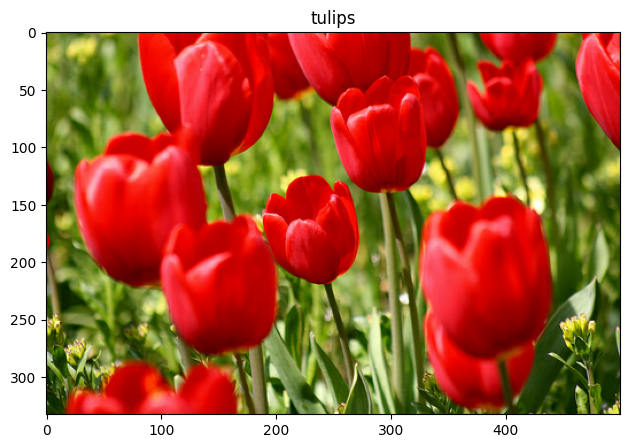

In [24]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

#### Use Keras preprocessing layers
##### Resizing and rescaling
You can use the `Keras preprocessing layers` to resize your images to a consistent shape (with tf.keras.layers.Resizing), and to rescale pixel values (with tf.keras.layers.Rescaling).

In [25]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

`Note:` The rescaling layer above standardizes pixel values to the [0, 1] range.

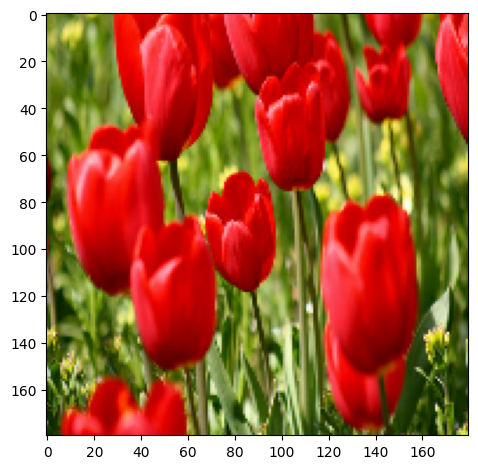

In [26]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

##### Verify that the pixels are in the [0, 1] range:

In [27]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


#### Data augmentation
You can use the Keras preprocessing layers for data augmentation as well, such as `tf.keras.layers.RandomFlip` and `tf.keras.layers.RandomRotation.`

Let's create a few preprocessing layers and apply them repeatedly to the same image.

In [28]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [29]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

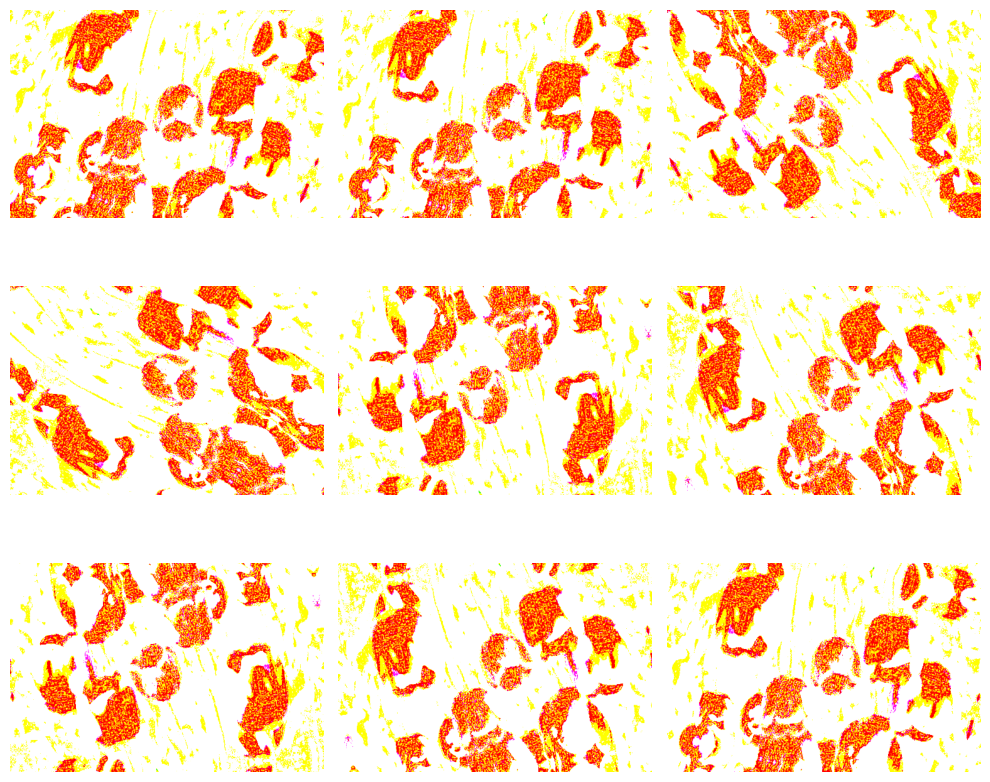

In [30]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

There are a variety of preprocessing layers you can use for data augmentation including `tf.keras.layers.RandomContrast`, `tf.keras.layers.RandomCrop`, `tf.keras.layers.RandomZoom`, and others.

#### Two options to use the Keras preprocessing layers
There are two ways you can use these preprocessing layers

##### Option 1: Make the preprocessing layers part of your model

In [31]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_2" is incompatible with the layer: expected shape=(None, 333, 500, 3), found shape=(180, 180, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(180, 180, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_16>',)
  • kwargs={'mask': 'None'}

#### Option 2: Apply the preprocessing layers to your dataset

In [32]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

Let's demonstrate the second option here.

#### Apply the preprocessing layers to the datasets
Configure the training, validation, and test datasets with the Keras preprocessing layers you created earlier.

In [33]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [34]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

#### Train a model
For completeness, you will now train a model using the datasets you have just prepared.

The Sequential model consists of three convolution blocks `(tf.keras.layers.Conv2D)` with a max pooling layer `(tf.keras.layers.MaxPooling2D)` in each of them. There's a fully-connected layer `(tf.keras.layers.Dense)` with 128 units on top of it that is activated by a ReLU activation function `('relu')`. This model has not been tuned for accuracy (the goal is to show you the mechanics).

In [35]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train for a few epochs:

In [37]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 515ms/step - accuracy: 0.4070 - loss: 1.4010 - val_accuracy: 0.4605 - val_loss: 1.1904
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 519ms/step - accuracy: 0.5405 - loss: 1.1028 - val_accuracy: 0.5940 - val_loss: 1.0519
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 453ms/step - accuracy: 0.5988 - loss: 1.0103 - val_accuracy: 0.6185 - val_loss: 0.9612
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 466ms/step - accuracy: 0.6189 - loss: 0.9490 - val_accuracy: 0.6431 - val_loss: 0.8999
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 412ms/step - accuracy: 0.6536 - loss: 0.8965 - val_accuracy: 0.6131 - val_loss: 0.9954


In [38]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5967 - loss: 0.9453 
Accuracy 0.5967302322387695


### Custom data augmentation
You can also create custom data augmentation layers.

two ways of doing so:

- First, you will create a `tf.keras.layers.Lambda layer`. This is a good way to write concise code.
- Next, you will write a new layer via subclassing, which gives you more control.

Both layers will randomly invert the colors in an image, according to some probability.

In [39]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [40]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

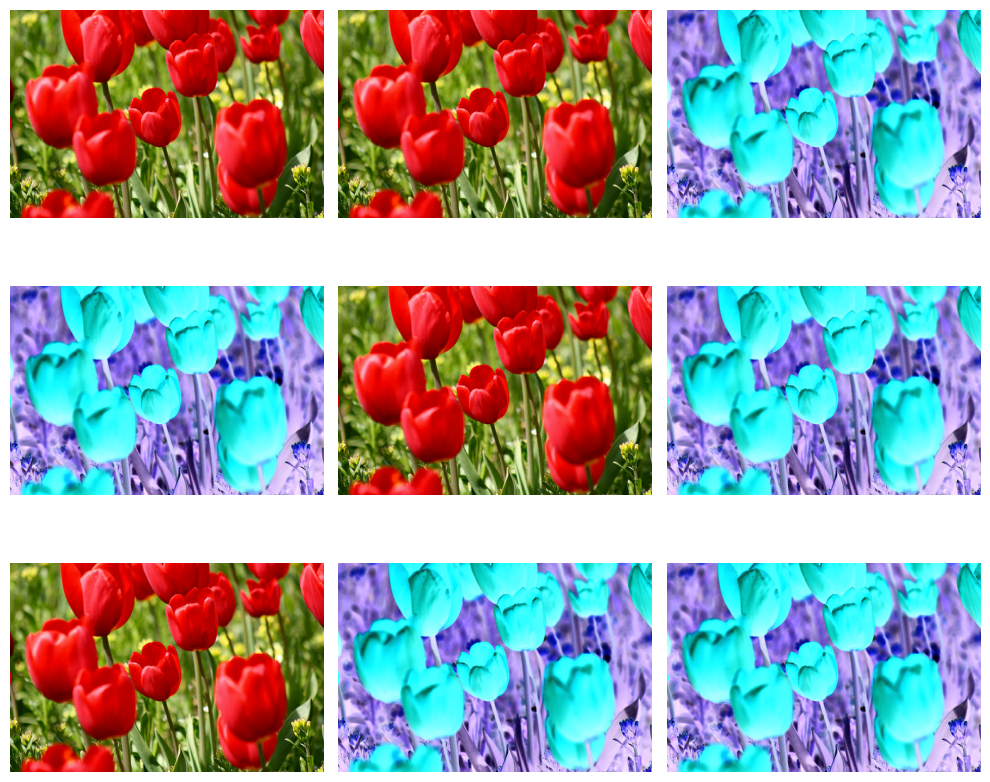

In [41]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

Next, implement a custom layer by `subclassing`:

In [42]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

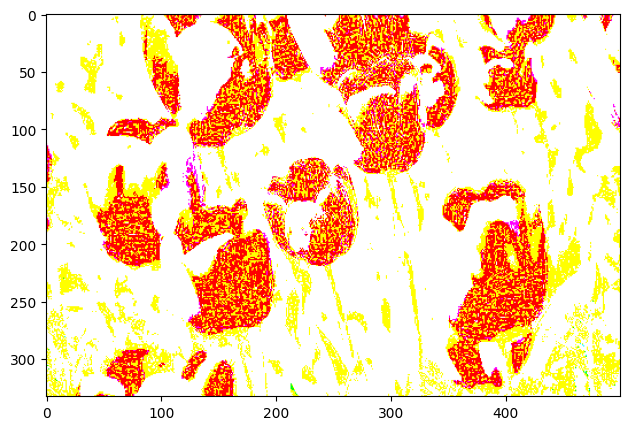

In [43]:
_ = plt.imshow(RandomInvert()(image)[0])

### Using tf.image
The above Keras preprocessing utilities are convenient. But, for finer control, you can write your own data augmentation pipelines or layers using `tf.data` and `tf.image`.

Since the flowers dataset was previously configured with data augmentation, let's reimport it to start fresh:

In [44]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Retrieve an image to work with:

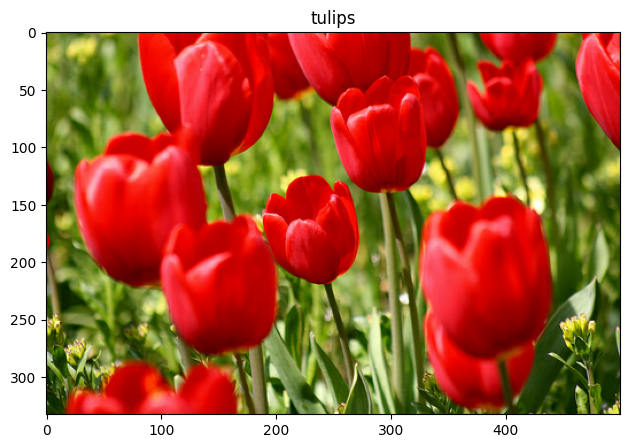

In [45]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

Let's use the following function to visualize and compare the original and augmented images side-by-side:

In [47]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

### Data augmentation
#### Flip an image
Flip an image either vertically or horizontally with `tf.image.flip_left_right`:

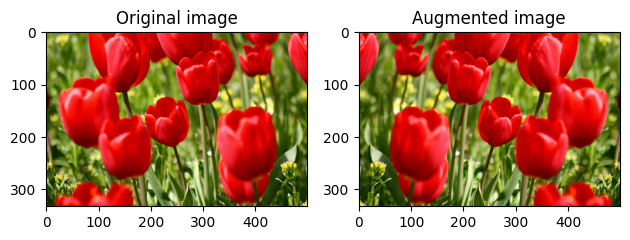

In [48]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

### Grayscale an image
You can grayscale an image with `tf.image.rgb_to_grayscale`:

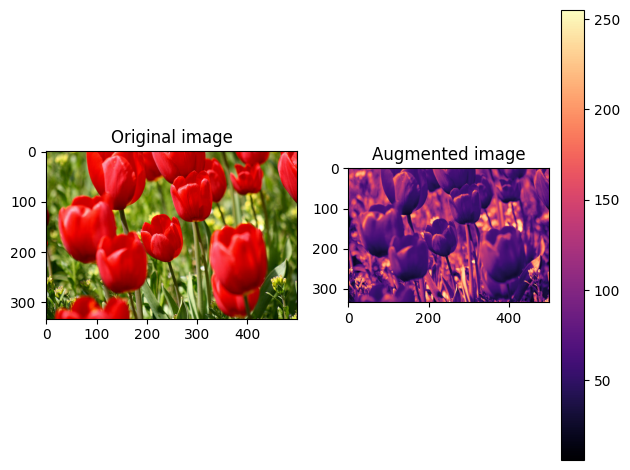

In [49]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

### Saturate an image
Saturate an image with `tf.image.adjust_saturation` by providing a saturation factor:

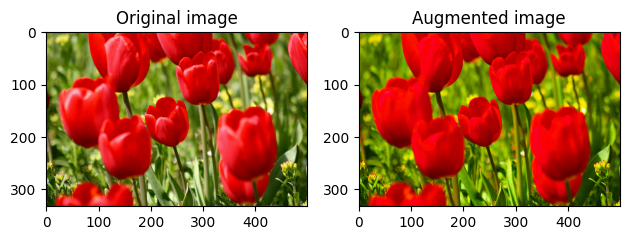

In [50]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

### Change image brightness
Change the brightness of image with `tf.image.adjust_brightness` by providing a brightness factor:

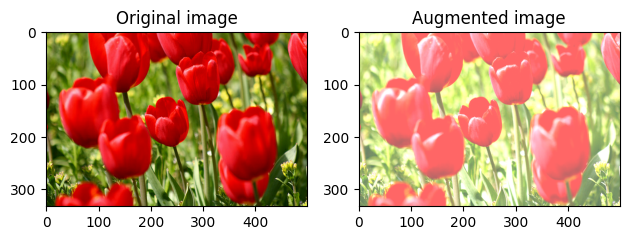

In [51]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

### Center crop an image
Crop the image from center up to the image part you desire using `tf.image.central_crop:`

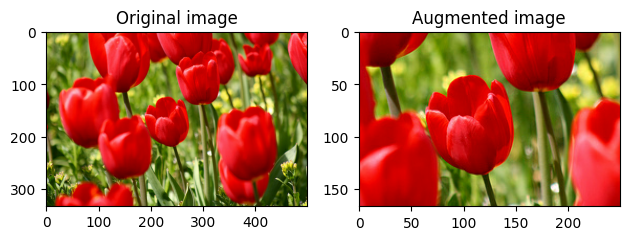

In [52]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

### Rotate an image
Rotate an image by 90 degrees with `tf.image.rot90`:

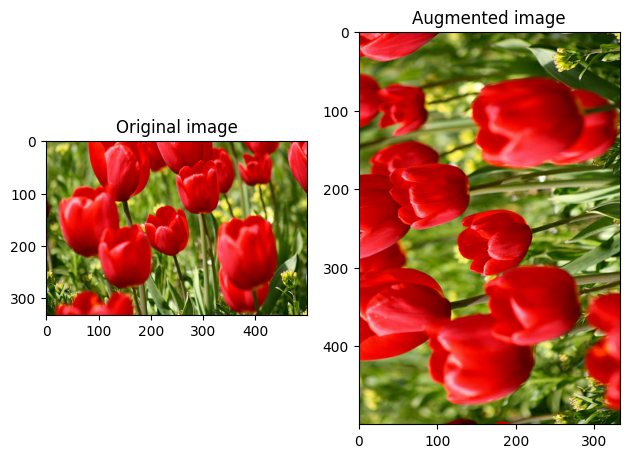

In [53]:
rotated = tf.image.rot90(image)
visualize(image, rotated)